In [4]:
import tensorflow
import os
import shutil
import keras
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import pandas as pd
import joblib
import tensorflow_addons as tfa

### Defining Model Structure

Here we define our model structure using data augmentation to augment are training dataset and then call this function to create a model.

In [5]:
image_height, image_width = 500, 500
batch_size = 32

def create_model(image_height, image_width):

    # Defining data augmentation layer
    data_augmentation = keras.Sequential([
            keras.layers.RandomFlip("horizontal_and_vertical"),
            keras.layers.RandomRotation(0.2),
            ])
    #Defining model
    model = keras.Sequential([
            data_augmentation,
            keras.layers.Rescaling(1./255),
            keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
            keras.layers.MaxPool2D((2, 2)),
            keras.layers.Conv2D(32, (3, 3), activation='relu'),
            keras.layers.MaxPool2D((2, 2)),
            keras.layers.Conv2D(64, (3, 3), activation='relu'),
            keras.layers.MaxPool2D((2, 2)),
            keras.layers.Flatten(),
            keras.layers.Dense(512, activation='relu'),
            keras.layers.Dense(1, activation='sigmoid')
        ])
        
    #Compling model
    model.compile(loss='binary_crossentropy',
                        optimizer='adam', 
                        metrics=[tfa.metrics.F1Score(num_classes = 2, threshold = 0.5, average="micro")])

In [6]:
my_model = create_model(image_height, image_width)

### Loading Data
Reaing in the images from our directory

In [7]:
# Path to read data from
data_dir = './Data/'

# Defining train an validation splits using 80/20 split
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(image_height, image_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(image_height, image_width),
  batch_size=batch_size)

Found 19982 files belonging to 2 classes.
Using 15986 files for training.
Found 19982 files belonging to 2 classes.
Using 3996 files for validation.


### Visualizing Data

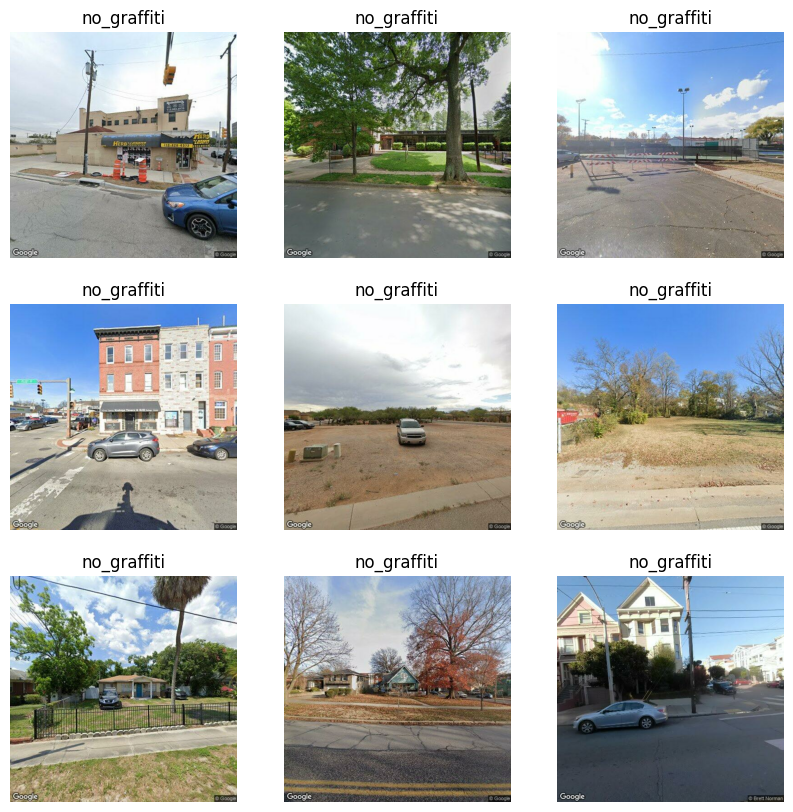

In [8]:
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### Training Model

Now that we have our training data and model defined we can now train it

In [ ]:
my_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)